# Kütüphaneler

In [ ]:
!pip install catboost
!pip install lightgbm
!pip install gdown

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score
from lightgbm import LGBMRegressor
import glob
import os
import shutil

**Google drive'dan veri setimizi ve gerekli dosyalarımızı indirelim.**

In [ ]:
!gdown --id 1ZOvwyjxtQYa3VNjECSZCQyEYqoR2tDXb
!gdown --id 1wKejL9j0QPmV7oQLkGvMkJ4gJG3X_BOI
!gdown --id 1oSiWumalsW_KGsRcCAqhaBWMl8DNaE9B
!gdown --id 1CRCm1jn13JfdkpdFZ4sZjt1kqsxoko0x
!gdown --id 10jYtttcrrDcYKl-NJBFfJGcU0HDPQGEz
!gdown --id 1QEhm29Cmm4knAnBtPmaKJeb_sRsVuALj
!gdown --id 18bKqz7K-2JoO5bhPIypaNXMC_eZddlLa
!gdown --id 1PC71NMkNCRAUcIzt34Y6nlKj1q0WD3wg
!gdown --id 1zE0lU883p5o8SZzMA-3Dety8NWBkKqsB
!gdown --id 1n2_zocTJO5zJzjva4ENv7e_RzkUlqKJz
!gdown --id 1qRcliOb56t7ip5copHTPGousKGFnLx4n


!gdown --id 13TSa0wNJ8BiqBQ5fCBOdkyBtyExQ1Yuu

# 'gorsel' adında bir klasör oluştur
os.makedirs('gorsel', exist_ok=True)

# .png uzantılı tüm dosyaları bul
png_files = glob.glob('*.png')

# Her dosyayı yeni klasöre taşı
for file in png_files:
    shutil.move(file, 'gorsel/')

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ZOvwyjxtQYa3VNjECSZCQyEYqoR2tDXb
To: /content/rmse.png
100% 15.8k/15.8k [00:00<00:00, 39.0MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1wKejL9j0QPmV7oQLkGvMkJ4gJG3X_BOI
To: /content/split.png
100% 5.72k/5.72k [00:00<00:00, 21.8MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1

# Veri Ön Hazırlık ve Temizleme

In [ ]:
df = pd.read_csv("testset.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime_utc  100990 non-null  object 
 1    _conds       100918 non-null  object 
 2    _dewptm      100369 non-null  float64
 3    _fog         100990 non-null  int64  
 4    _hail        100990 non-null  int64  
 5    _heatindexm  29155 non-null   float64
 6    _hum         100233 non-null  float64
 7    _precipm     0 non-null       float64
 8    _pressurem   100758 non-null  float64
 9    _rain        100990 non-null  int64  
 10   _snow        100990 non-null  int64  
 11   _tempm       100317 non-null  float64
 12   _thunder     100990 non-null  int64  
 13   _tornado     100990 non-null  int64  
 14   _vism        96562 non-null   float64
 15   _wdird       86235 non-null   float64
 16   _wdire       86235 non-null   object 
 17   _wgustm      1072 non-null    float64
 18   _wi

**Hava Durumu Data Seti Kolon Kısaltmalarının Açıklamaları**<br>


    '_dewptm': 'Çiğ Noktası Sıcaklığı',
    '_fog': 'Sis',
    '_hail': 'Dolu',
    '_hum': 'Nem',
    '_pressurem': 'Basınç',
    '_rain': 'Yağmur',
    '_snow': 'Kar',
    '_tempm': 'Sıcaklık',
    '_thunder': 'Gökgürültüsü',
    '_tornado': 'Tornado',
    '_vism': 'Görüş Mesafesi',
    '_wspdm': 'Rüzgar Hızı',
    'Blowing Sand': 'Kum Fırtınası',
    'Clear': 'Açık',
    'Drizzle': 'Çiseleyen Yağmur',
    'Fog': 'Sisli',
    'Funnel Cloud': 'Hortum Bulutu',
    'Haze': 'Pus',
    'Heavy Fog': 'Yoğun Sis',
    'Heavy Rain': 'Yoğun Yağmur',
    'Heavy Thunderstorms and Rain': 'Yoğun Gökgürültülü Sağanak Yağmur',
    'Heavy Thunderstorms with Hail': 'Yoğun Gökgürültülü Dolu Yağışı',
    'Light Drizzle': 'Hafif Çiseleyen Yağmur',
    'Light Fog': 'Hafif Sis',
    'Light Freezing Rain': 'Hafif Donmuş Yağmur',
    'Light Hail Showers': 'Hafif Dolu Sağanakları',
    'Light Haze': 'Hafif Pus',
    'Light Rain': 'Hafif Yağmur',
    'Light Rain Showers': 'Hafif Yağmur Sağanakları',
    'Light Sandstorm': 'Hafif Kum Fırtınası',
    'Light Thunderstorm': 'Hafif Gökgürültülü Sağanak',
    'Light Thunderstorms and Rain': 'Hafif Gökgürültülü Sağanak Yağmur',
    'Mist': 'Sis',
    'Mostly Cloudy': 'Genellikle Bulutlu',
    'Overcast': 'Kapalı',
    'Partial Fog': 'Kısmi Sisli',
    'Partly Cloudy': 'Parçalı Bulutlu',
    'Patches of Fog': 'Sis Yer Yer',
    'Rain': 'Yağmur',
    'Rain Showers': 'Yağmur Sağanakları',
    'Sandstorm': 'Kum Fırtınası',
    'Scattered Clouds': 'Parçalı Bulutlu',
    'Shallow Fog': 'Hafif Sis',
    'Smoke': 'Duman',
    'Squalls': 'Fırtınalı Rüzgarlar',
    'Thunderstorm': 'Gökgürültülü Sağanak',
    'Thunderstorms and Rain': 'Gökgürültülü Sağanak Yağmur',
    'Thunderstorms with Hail': 'Gökgürültülü Dolu Yağışı',
    'Unknown': 'Bilinmeyen',
    'Volcanic Ash': 'Volkanik Küller',
    'Widespread Dust': 'Geniş Alanlarda Toz'


In [ ]:
def eksik_deger_tablosu(df):
    eksik_deger = df.isnull().sum()
    eksik_deger_yuzde = 100 * df.isnull().sum()/len(df)
    eksik_deger_tablo = pd.concat([eksik_deger, eksik_deger_yuzde], axis=1)
    eksik_deger_tablo_son = eksik_deger_tablo.rename(
    columns = {0 : 'Eksik Değerler', 1 : '% Değeri'})
    return eksik_deger_tablo_son

eksik_deger_tablosu(df)

,Eksik Değerler,% Değeri
datetime_utc,0,0.000000
_conds,72,0.071294
_dewptm,621,0.614912
_fog,0,0.000000
_hail,0,0.000000
_heatindexm,71835,71.130805
_hum,757,0.749579
_precipm,100990,100.000000
_pressurem,232,0.229726
_rain,0,0.000000


<Axes: >

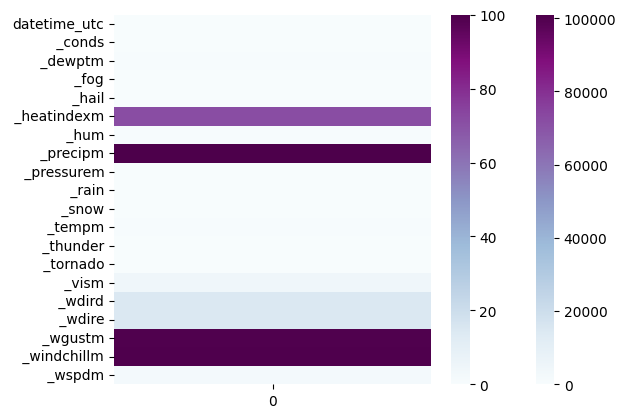

In [ ]:
sns.heatmap( df.isnull().sum().to_frame(), cmap='BuPu')
sns.heatmap( (100 * df.isnull().sum()/len(df)).to_frame(), cmap='BuPu')

**Renk scalasına bakarak eksik veri sayısını görebiliriz.<br>
 Açık mavi renkte eksik veri yok demektir.<br>
 Mor renk 100.000 eksik veriyi temsil etmektedir.**

# Korelasyon Analizi ve Görselleştirme

**Veri kaybının %14 ve üzeri olan kolonları droplanmalı.**

In [ ]:
df.drop(["datetime_utc"," _windchillm"," _wgustm"," _wdire"," _wdird"," _precipm"," _heatindexm"], axis = 1, inplace = True)

**En çok hava şartı olan object bulundu. Haze : puslu hava**

In [ ]:
df[" _conds"].value_counts().idxmax()

'Haze'

**Hava şartlarında ki boşluklar en çok tekrar eden Haze değeri ile dolduruldu.**

In [ ]:
df[" _conds"] = df[" _conds"].fillna(df[" _conds"].value_counts().idxmax())

**Son olarak kolon object tipinde olduğundan get dummies yapısına çevrildi.**

In [ ]:
df_encoded = pd.get_dummies(df[' _conds'], prefix='encoded')
df = pd.concat([df, df_encoded], axis=1).reindex(df.index)
df.drop(' _conds', axis=1, inplace=True)

**Korolasyon tablosu görselleştirilerek sayısal veriye dahi bakmadan fikir sahibi olunacak hale getiirildi.**

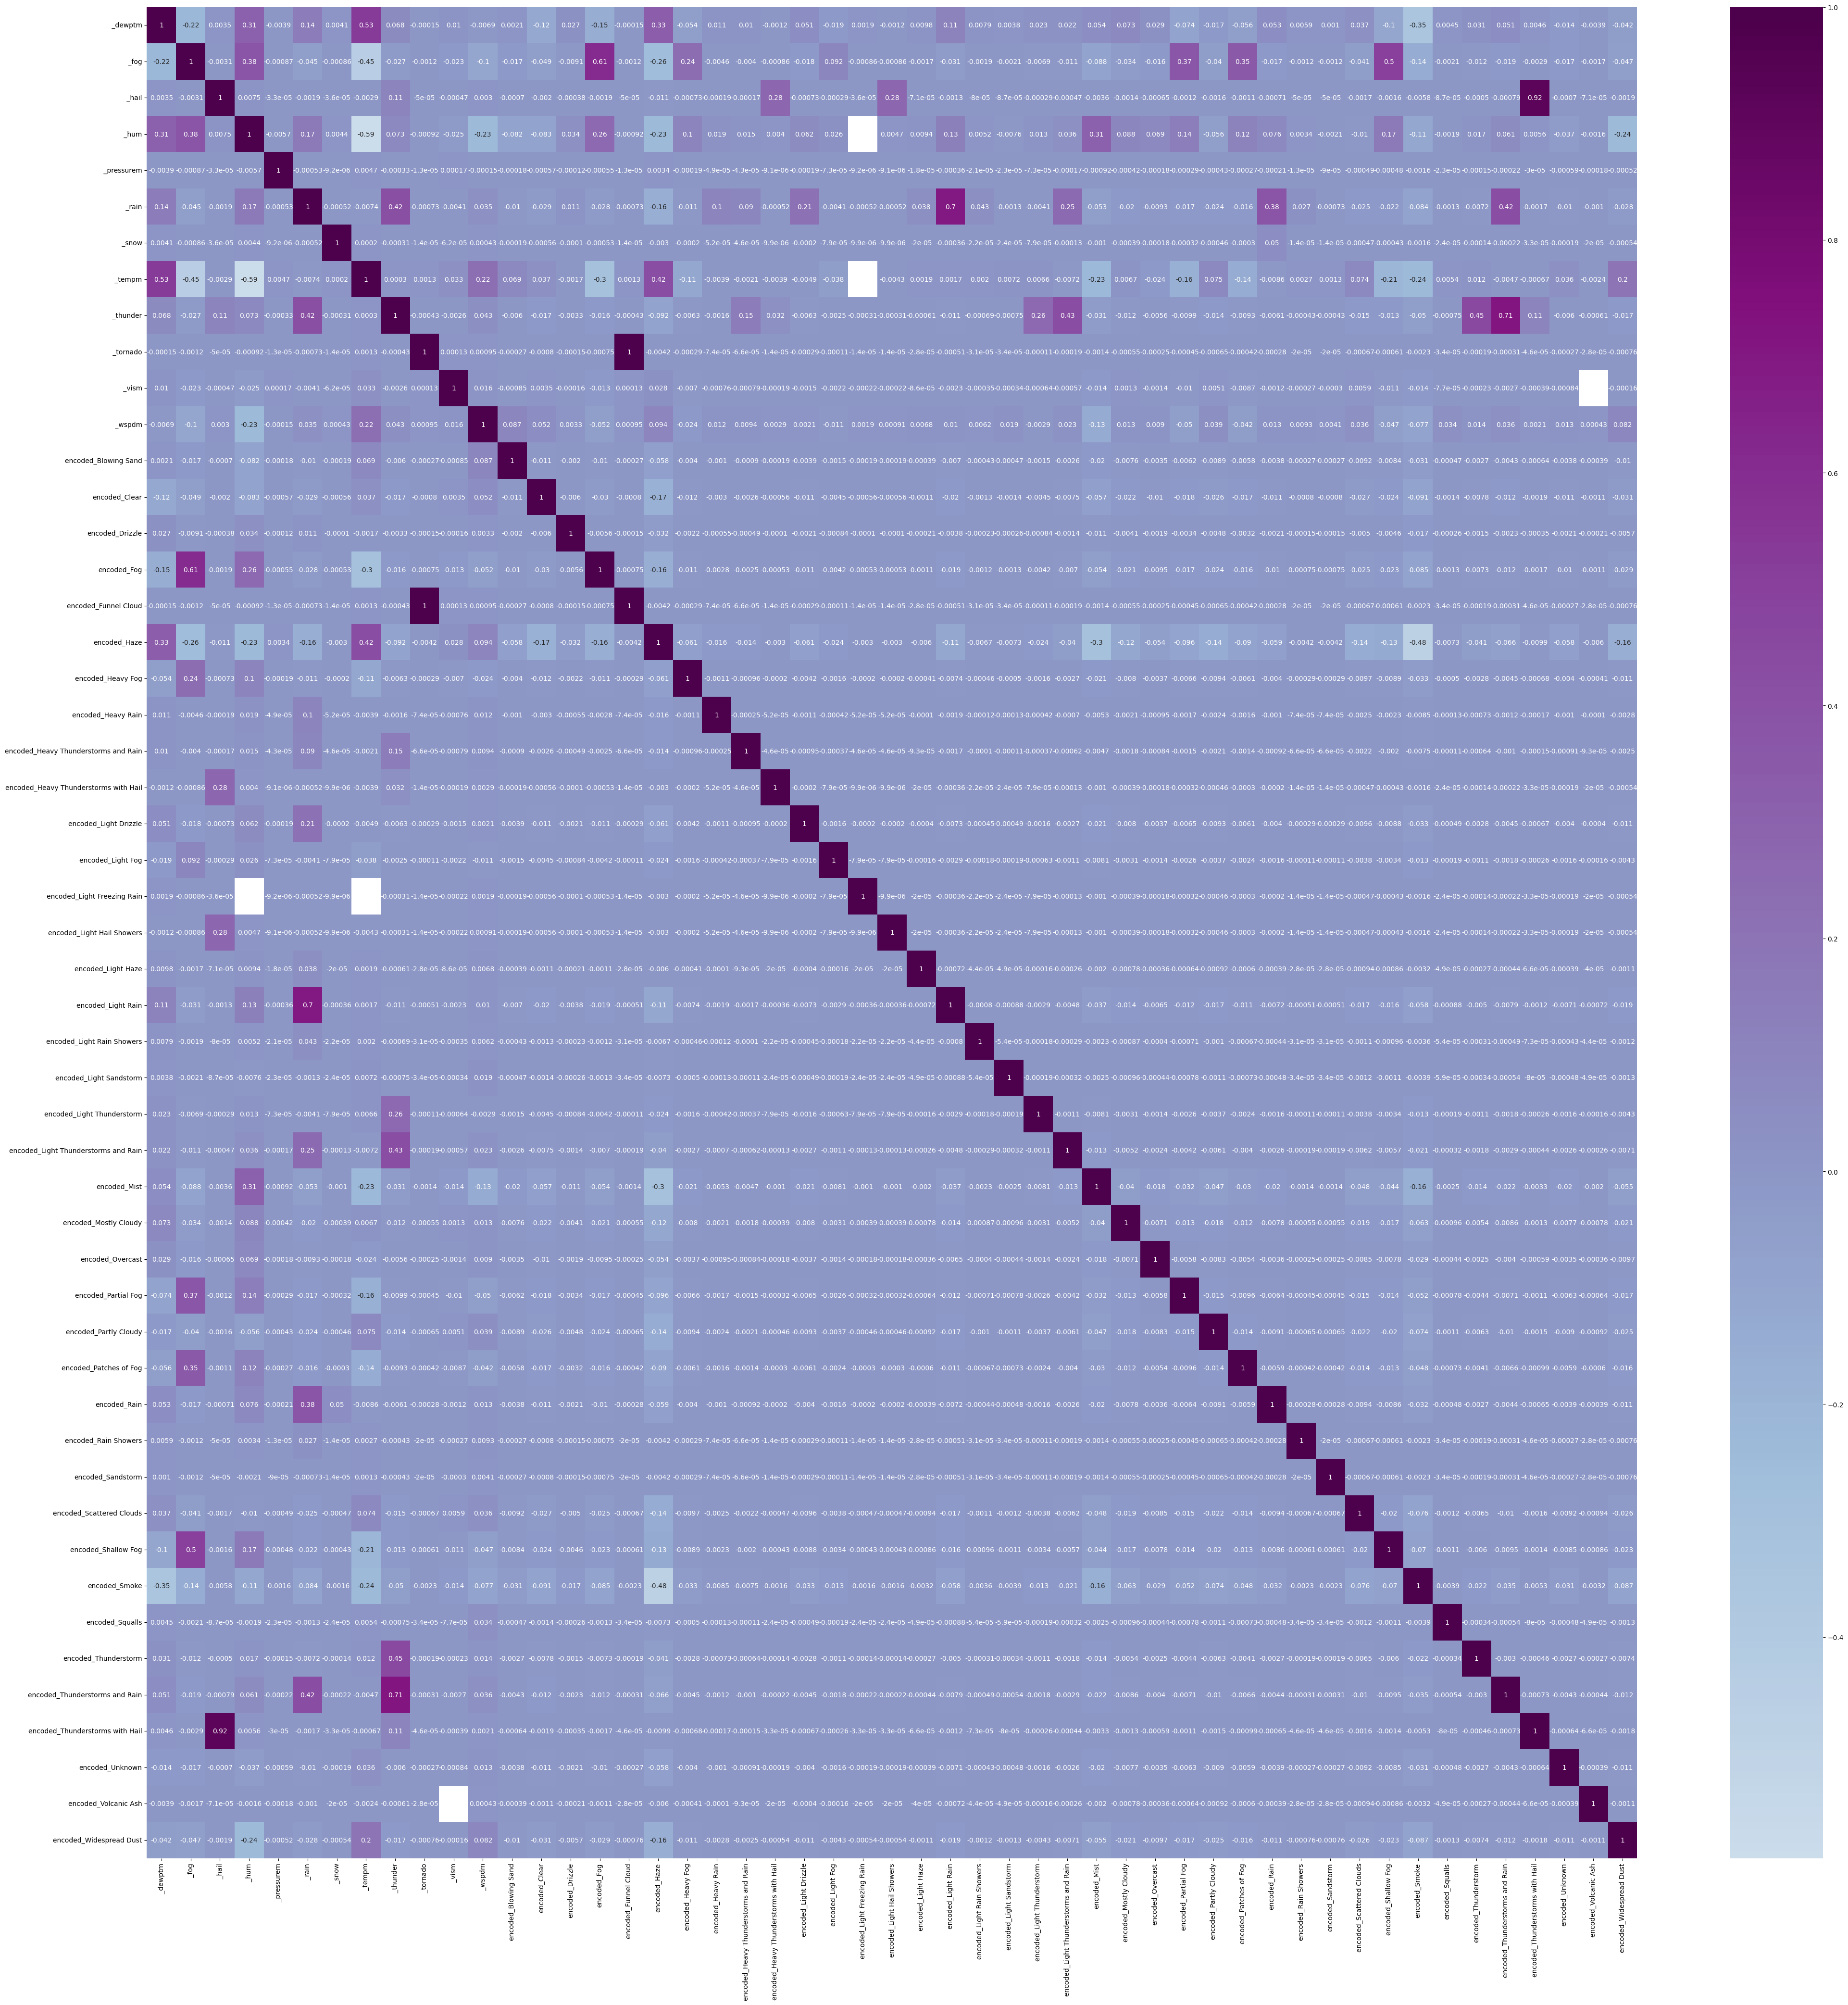

In [ ]:
plt.figure(figsize=(50, 50))
p = sns.heatmap(df.corr(), annot=True, cmap='BuPu', center=0)

**corr( ) değeri NaN olan kolonları atılmalı.**

In [ ]:
df.drop("encoded_Light Freezing Rain", axis=1, inplace=True)

**Encoded yapıldıktan sonra kolon sayısı 58 e çıktığı için bir düzenleme yapma gereksinimi duyuldu.<br>
Kolonlardan modelimizi saptıracak düşüncesi ile nem ile arasındaki
Korelasyon değeri düşük olanlar minumum 0.05 kabulü ile elemine edilecek..**

In [ ]:
column_list = df.columns.tolist()

In [ ]:
for i in column_list:
    if (abs(df[" _hum"].corr(df[i])) < 0.05):
        df.drop(i, axis=1, inplace=True)

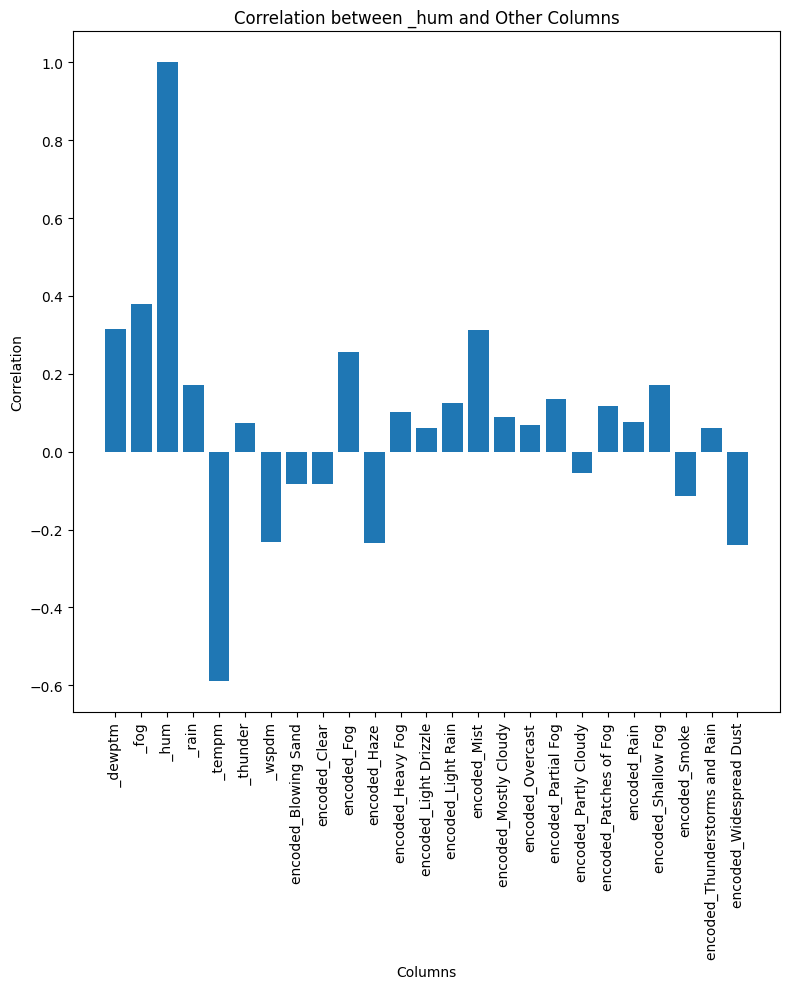

In [ ]:
correlation_values = []
column_list = df.columns.tolist()

for i in column_list:
    correlation = df[" _hum"].corr(df[i])
    correlation_values.append(correlation)
plt.figure(figsize=(8, 10))
plt.bar(column_list, correlation_values)
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Correlation")
plt.title("Correlation between _hum and Other Columns")
plt.tight_layout()
plt.show()

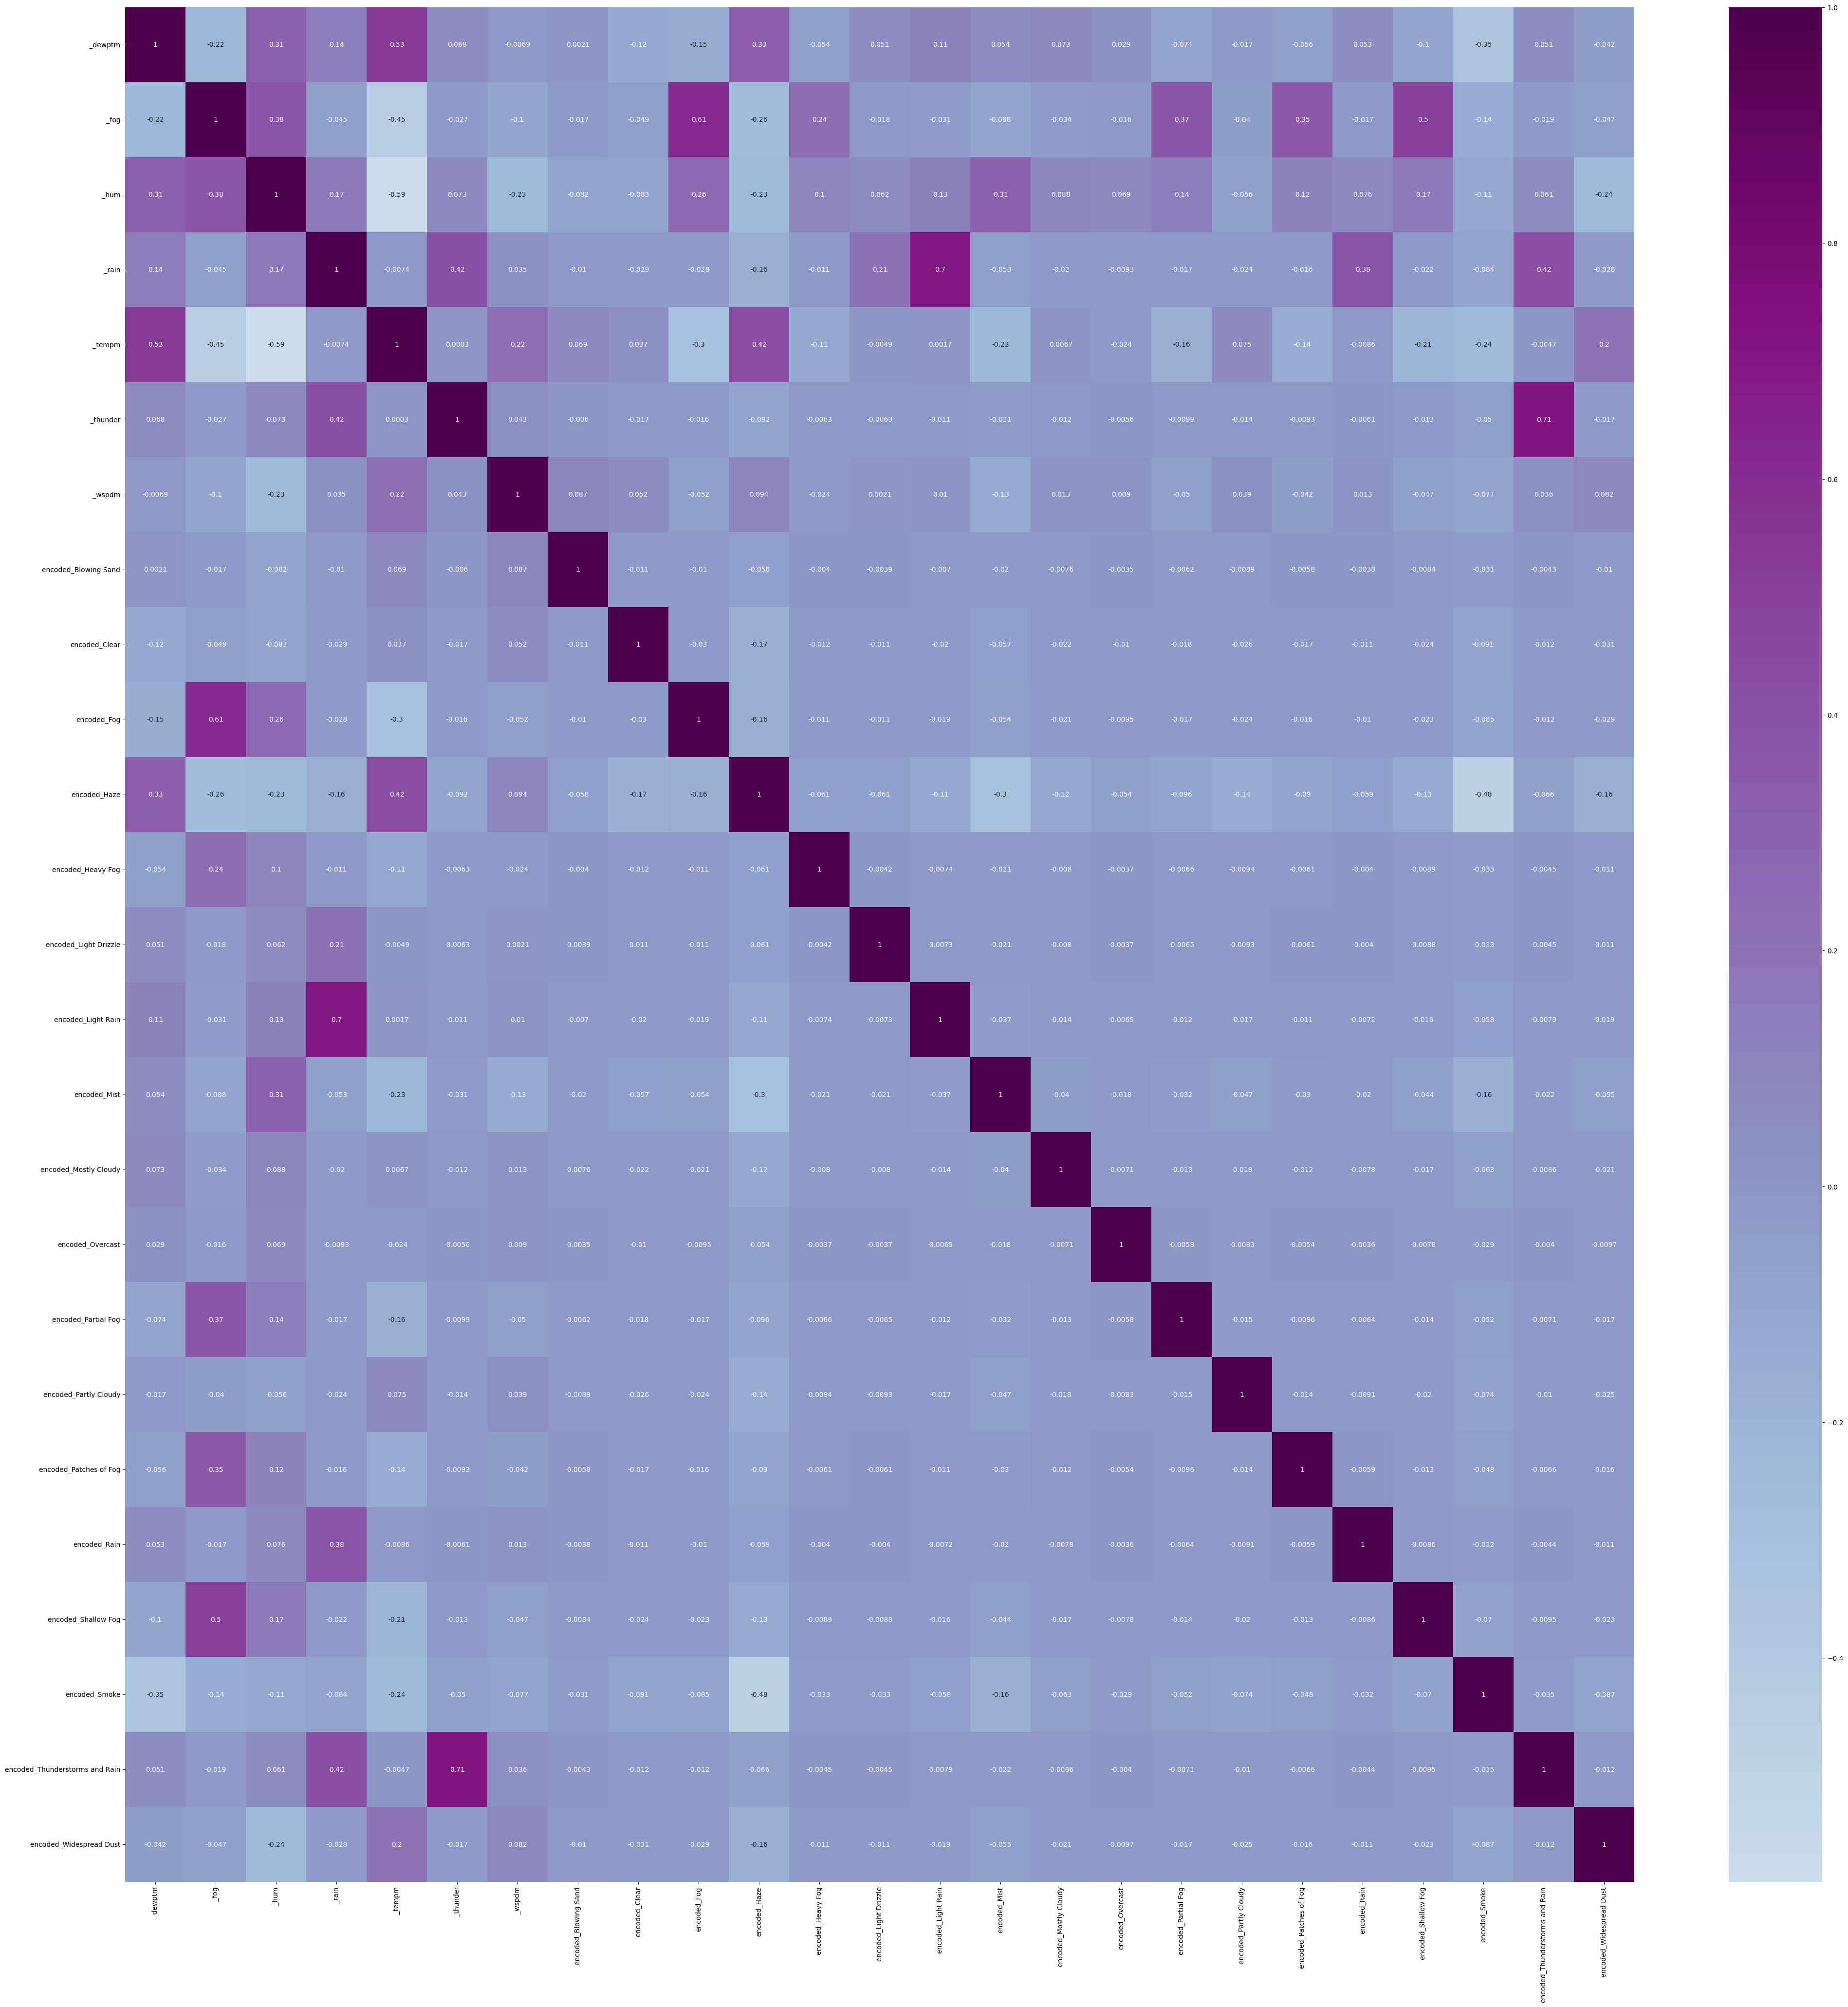

In [ ]:
plt.figure(figsize=(50, 50))
p = sns.heatmap(df.corr(), annot=True, cmap='BuPu', center=0)

**Sayısal kolonlarda aykırı değerler tespit edildi.**

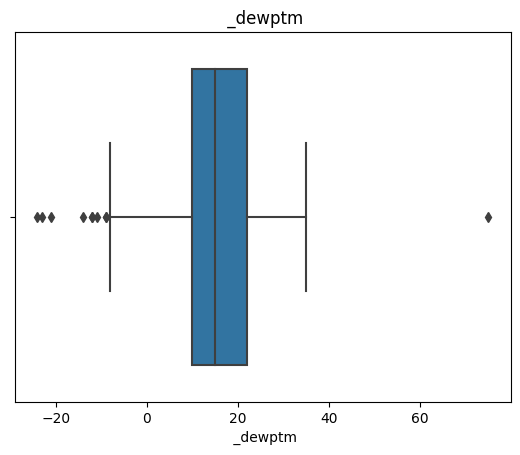

 _dewptm için ayrık veri sayısı: 10
10251   -24.0
23760   -12.0
28141   -23.0
54939    75.0
55691   -14.0
63080    -9.0
63105    -9.0
64093   -21.0
65263   -11.0
93661   -12.0
Name:  _dewptm, dtype: float64
Aykırı verinin yüzdeliği: 0.009901970492127933
-------------------------------------------------------------
 _dewptm için İstatiksel veriler
count    100369.000000
mean         15.741205
std           7.058587
min         -24.000000
25%          10.000000
50%          15.000000
75%          22.000000
max          75.000000
Name:  _dewptm, dtype: float64


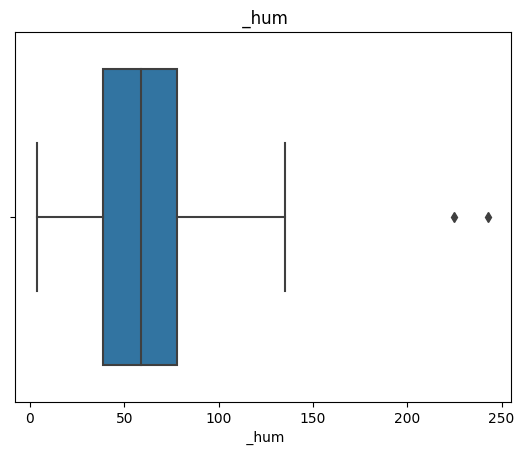

 _hum için ayrık veri sayısı: 2
61570    225.0
95248    243.0
Name:  _hum, dtype: float64
Aykırı verinin yüzdeliği: 0.0019803940984255866
-------------------------------------------------------------
 _hum için İstatiksel veriler
count    100233.000000
mean         57.909481
std          23.807771
min           4.000000
25%          39.000000
50%          59.000000
75%          78.000000
max         243.000000
Name:  _hum, dtype: float64


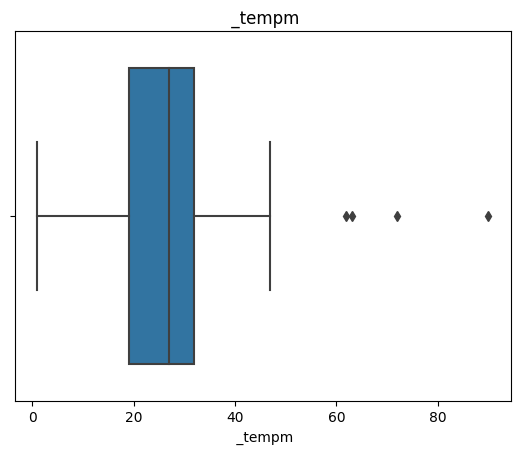

 _tempm için ayrık veri sayısı: 4
11084    72.0
12951    63.0
68077    62.0
91391    90.0
Name:  _tempm, dtype: float64
Aykırı verinin yüzdeliği: 0.003960788196851173
-------------------------------------------------------------
 _tempm için İstatiksel veriler
count    100317.000000
mean         25.451269
std           8.482859
min           1.000000
25%          19.000000
50%          27.000000
75%          32.000000
max          90.000000
Name:  _tempm, dtype: float64


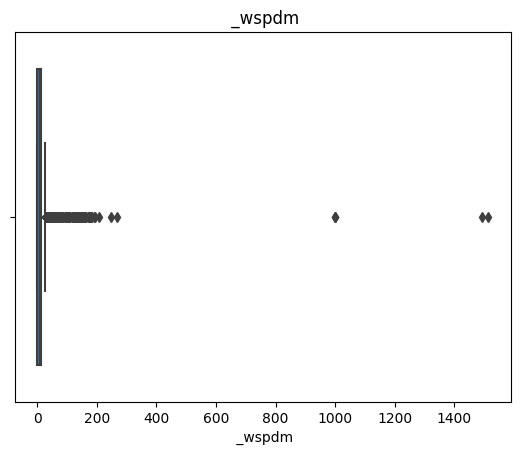

 _wspdm için ayrık veri sayısı: 1425
743       27.8
765       33.3
766       29.6
786       29.6
787       33.3
          ... 
100744    27.8
100818    35.2
100869    33.3
100870    27.8
100875    31.5
Name:  _wspdm, Length: 1425, dtype: float64
Aykırı verinin yüzdeliği: 1.4110307951282306
-------------------------------------------------------------
 _wspdm için İstatiksel veriler
count    98632.000000
mean         7.678463
std         11.932157
min          0.000000
25%          0.000000
50%          7.400000
75%         11.100000
max       1514.900000
Name:  _wspdm, dtype: float64


In [ ]:
T = [" _dewptm", " _hum", " _tempm"," _wspdm"]

for i in T:
    sns.boxplot(x=df[i])
    plt.title(i)
    plt.show()
    q1 = df[i].describe(percentiles=[0.25])["25%"]
    q3 = df[i].describe(percentiles=[0.75])["75%"]
    a = q3 - q1
    lower_bound = q1 - 1.5 * a
    upper_bound = q3 + 1.5 * a
    outliers = df[i][(df[i] < lower_bound) | (df[i] > upper_bound)]
    print(f"{i} için ayrık veri sayısı:",len(outliers))
    print(outliers)
    print("Aykırı verinin yüzdeliği:",100*(len(outliers)/len(df)))
    print("-------------------------------------------------------------")
    print(f"{i} için İstatiksel veriler")
    print(df[i].describe())

**[" _wspdm"] kolonunda aykırı değer sayısı büyük ve  verinin %1'inden fazla  olmasından dolayı [" _wspdm"] kolonu atılacak.**

In [ ]:
df.drop(" _wspdm", axis=1, inplace=True)

**[ " _hum"] kolonlarında eksik değerler az olduğu için eksik değer
içeren satırları silindi.**

In [ ]:
df[" _hum"].fillna(df[" _hum"].mean(), inplace=True)

**" _tempm"," _dewptm" kolonlarından boşluk doldurmak için median ve mod kullanamıyoruz.<br>
Çünkü linear ve polynomial yaklaşım tablolarında sapmalara sebep oluyor.**

![median_hata](gorsel/median_hata.png)

In [ ]:
df = df.dropna(subset=[" _tempm"])

In [ ]:
df = df.dropna(subset=[" _dewptm"])

**[" _dewptm", " _hum", " _tempm"] kolonlarındaki aykırı değerlerin sayısı düşük olduğundan
bu kolonlardaki aykırı değerleri içeren satırlar silidi.**

In [ ]:
column_list = [" _dewptm", " _hum", " _tempm"]

for column in column_list:
    q1 = df[column].describe(percentiles=[0.25])["25%"]
    q3 = df[column].describe(percentiles=[0.75])["75%"]
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = df[column][(df[column] < lower_bound) | (df[column] > upper_bound)]
    df = df.drop(outliers.index)

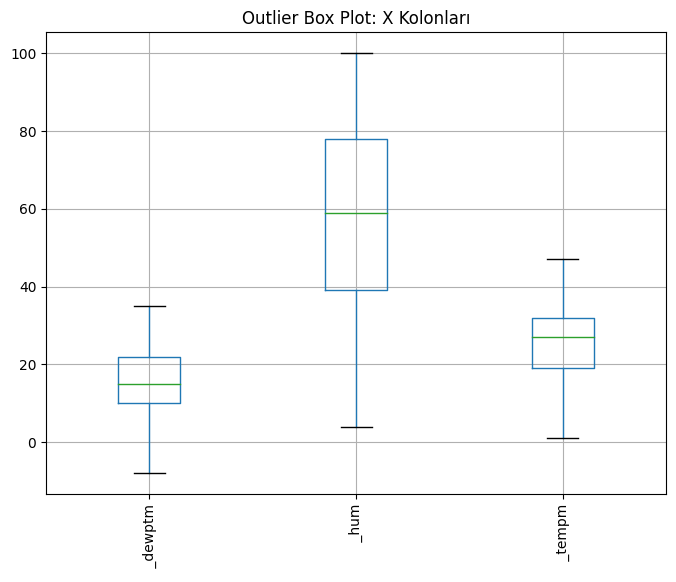

In [ ]:
column_list
X = df[column_list]
# Kutu grafiği oluşturma
plt.figure(figsize=(8, 6))  # Grafiğin boyutu
X.boxplot()
plt.xticks(rotation=90)  # x ekseni etiketlerinin dönüş açısı
plt.title("Outlier Box Plot: X Kolonları")
plt.show()

#  Multiple Linear Regression


**Bir tane bağımlı değişken (Y) ile bununla ilişkisi olan bir dizi bağımsız değişken (X) arasındaki ilişkiyi ifade eden doğrusal fonksiyonu hataların en az olacağı şekilde ortaya koymak için yapılan analizdir.**

![mlr1](gorsel/MLR1.png)  ![mlr](gorsel/mlr.png)

In [ ]:
column_list = df.columns.tolist()
print(column_list)
column_list.remove(" _hum")

[' _dewptm', ' _fog', ' _hum', ' _rain', ' _tempm', ' _thunder', 'encoded_Blowing Sand', 'encoded_Clear', 'encoded_Fog', 'encoded_Haze', 'encoded_Heavy Fog', 'encoded_Light Drizzle', 'encoded_Light Rain', 'encoded_Mist', 'encoded_Mostly Cloudy', 'encoded_Overcast', 'encoded_Partial Fog', 'encoded_Partly Cloudy', 'encoded_Patches of Fog', 'encoded_Rain', 'encoded_Shallow Fog', 'encoded_Smoke', 'encoded_Thunderstorms and Rain', 'encoded_Widespread Dust']


In [ ]:
X = df[column_list]
y = df[" _hum"]

In [ ]:
model = LinearRegression()

# Modeli X ve y verilerine uydurma (eğitme)
model.fit(X, y)

# Tahmin yapma
y_pred_linear = model.predict(X)
score1 = model.score(X, y)
print(score1)

0.9232226679481867


**MSE hataların karelerinin ortalamasını, yani tahmini değerler ile gerçek değer arasındaki ortalama kare farkını ölçer.** **Gerçek degerini bildigimiz bagımlı degişkenin  degerini model ile tahmin etmeye çalışıyoruz .Gerçek degerden tahmini degeri çıkarıp karesini alıyoruz . Kaç tane gözlemimiz varsa hepsi için ayrı ayrı bu işlemleri yapıp topluyoruz ve n sayısına bolup ortalamyı alıyoruz . Ortalama bir hata degeri hesaplamış oluyoruz .**

![MSE](gorsel/MSE.png)

In [ ]:
mse1 = mean_squared_error(y ,y_pred_linear)
mse1

43.445350921758084

**Root Mean Squared Error   MSE 'nin karekoku alınarak bulunur . MSE' de - sonuç çıkmaması için kare alarak işlem yapıyoruz sonuçlar çok buyuk çıkabileceği için burada sonucun karekokunu alıyoruz bir nevi düzeltme işlemi yapıyoruz aslında.**

![rmse](gorsel/rmse.png)

**Root Mean Squared Error  MSE 'nin karekoku .**


In [ ]:
# RMSE (Root Mean Squared Error)
rmse1 = np.sqrt(mean_squared_error(y ,y_pred_linear))
rmse1

6.591308741195339

# Polinom Regresyon Modeli

In [ ]:
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

# Polinom regresyon modelini oluşturma
model = LinearRegression()

# Modeli X_poly ve y verilerine uydurma (eğitme)
model.fit(X_poly, y)

# Tahmin yapma
y_pred_poly = model.predict(X_poly)
score2 = model.score(X_poly,y)
print(score2)

0.9745544269338279


In [ ]:
mse2 = mean_squared_error(y ,y_pred_poly)
print("MSE: ",mse2)
# RMSE (Root Mean Squared Error)
rmse2 = np.sqrt(mse2)
print("RMSE: ",rmse2)

MSE:  14.398674995883441
RMSE:  3.794558603564246


# Polinom Regresyon Modeli vs Lineer Regresyon Modeli

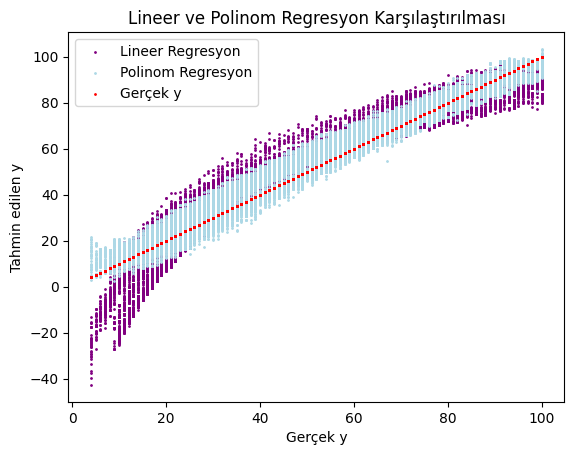

In [ ]:
#X = df[column_list]
#y = df[" _hum"]

plt.scatter(y, y_pred_linear, color='purple', label='Lineer Regresyon',s=1)
plt.scatter(y, y_pred_poly, color='lightblue', label='Polinom Regresyon',s=1)
plt.scatter(y, y, color='red', label='Gerçek y', s=1)  # Gerçek y değeri
plt.xlabel('Gerçek y')
plt.ylabel('Tahmin edilen y')
plt.title('Lineer ve Polinom Regresyon Karşılaştırılması')
plt.legend()
plt.show()

# Polinom Regresyon Modeli vs Lineer Regresyon Modeli MSE,RMSE

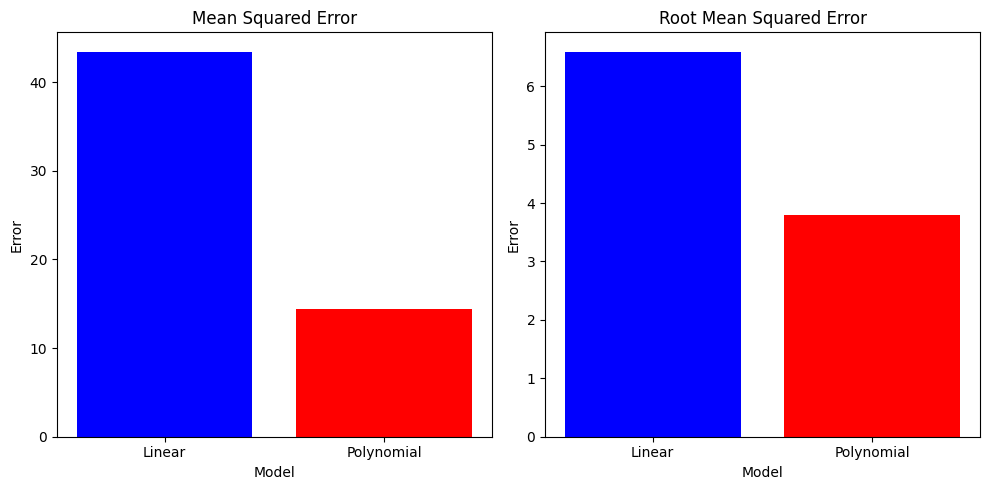

In [ ]:
# Hesaplanan hata değerlerini bir liste haline getir
mse_values = [mse1, mse2]
rmse_values = [rmse1, rmse2]

# Hata değerlerinin isimlerini bir liste haline getir
labels = ['Linear', 'Polynomial']

# MSE değerlerini görselleştir
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(labels, mse_values, color=['blue', 'red'])
plt.title('Mean Squared Error')
plt.xlabel('Model')
plt.ylabel('Error')

# RMSE değerlerini görselleştir
plt.subplot(1, 2, 2)
plt.bar(labels, rmse_values, color=['blue', 'red'])
plt.title('Root Mean Squared Error')
plt.xlabel('Model')
plt.ylabel('Error')

plt.tight_layout()
plt.show()


# Regresyonlar öncesi df'yi Train-Test olarak bölme

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Lineer Regresyon Modeli Train-Test Split

In [ ]:
# Lineer regresyon modelini oluşturma
model = LinearRegression()

# Modeli eğitim verilerine uydurma (eğitme)
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred_linear = model.predict(X_test)

# Modelin test seti üzerindeki başarısını değerlendirme (R-kare değeri)
score3 = model.score(X_test, y_test)
print("R-kare değeri:", score3)

mse3 = mean_squared_error(y_test ,y_pred_linear)
print("MSE: ",mse3)
# RMSE (Root Mean Squared Error)
rmse3 = np.sqrt(mse3)
print("RMSE: ",rmse3)

R-kare değeri: 0.9237762234732201
MSE:  43.219933335186354
RMSE:  6.574186895364806


# Polinom Regresyon Modeli Train-Test Split

In [ ]:
# Polinom özelliklerini oluşturma
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Polinom regresyon modelini oluşturma
model = LinearRegression()

# Modeli eğitim verilerine uydurma (eğitme)
model.fit(X_train_poly, y_train)

# Test seti üzerinde tahmin yapma
y_pred_poly = model.predict(X_test_poly)

# Modelin test seti üzerindeki başarısını değerlendirme (R-kare değeri)
score4 = model.score(X_test_poly, y_test)
print("R-kare değeri:", score4)
mse4 = mean_squared_error(y_test ,y_pred_poly)
print("MSE: ",mse4)
# RMSE (Root Mean Squared Error)
rmse4 = np.sqrt(mse4)
print("RMSE: ",rmse4)

R-kare değeri: 0.9746668113115527
MSE:  14.364267636328847
RMSE:  3.790022115546141


# Polinom Regresyon Modeli vs Lineer Regresyon Modeli

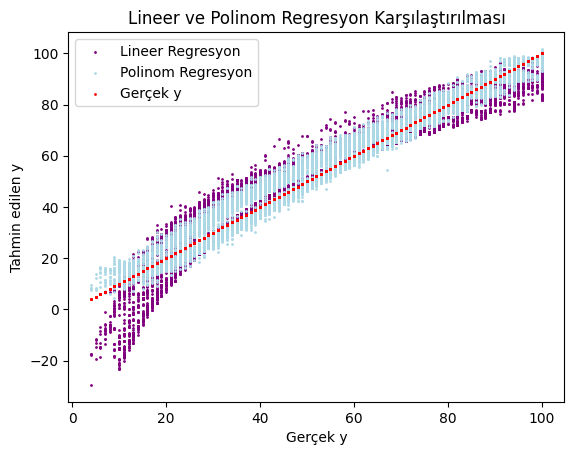

In [ ]:
# Scatter plot oluşturma
plt.scatter(y_test, y_pred_linear, color='purple', label='Lineer Regresyon', s=1)
plt.scatter(y_test, y_pred_poly, color='lightblue', label='Polinom Regresyon', s=1)
plt.scatter(y_test, y_test, color='red', label='Gerçek y', s=1)  # Gerçek y değeri
plt.xlabel('Gerçek y')
plt.ylabel('Tahmin edilen y')
plt.title('Lineer ve Polinom Regresyon Karşılaştırılması')
plt.legend()
plt.show()


# Polinom Regresyon Modeli vs Lineer Regresyon Modeli MSE,RMSE

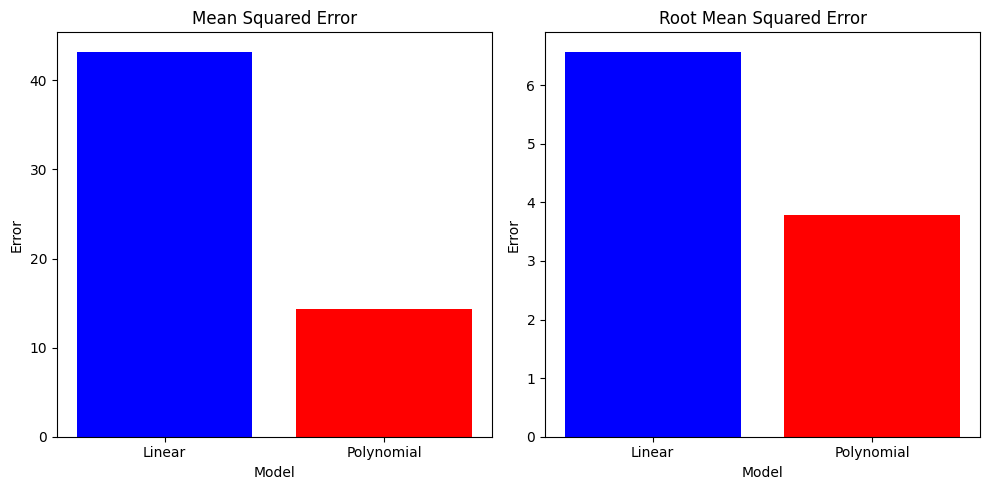

In [ ]:
# Hesaplanan hata değerlerini bir liste haline getir
mse_values = [mse3, mse4]
rmse_values = [rmse3, rmse4]

# Hata değerlerinin isimlerini bir liste haline getir
labels = ['Linear', 'Polynomial']

# MSE değerlerini görselleştir
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(labels, mse_values, color=['blue', 'red'])
plt.title('Mean Squared Error')
plt.xlabel('Model')
plt.ylabel('Error')

# RMSE değerlerini görselleştir
plt.subplot(1, 2, 2)
plt.bar(labels, rmse_values, color=['blue', 'red'])
plt.title('Root Mean Squared Error')
plt.xlabel('Model')
plt.ylabel('Error')

plt.tight_layout()
plt.show()


# CatboostRegressor ile Tahminleme

**kalın metin**![catboost](gorsel/catboost.png)

**CatBoost , Yandex tarafından geliştirilen açık kaynaklı bir yazılım kütüphanesidir . Diğer özelliklerin yanı sıra klasik algoritmaya kıyasla permütasyon odaklı bir alternatif kullanarak Kategorik özellikleri çözmeye çalışan bir gradyan artırma çerçevesi sağlar.**

**CatBoostRegressor, gradient boosting tabanlı bir regresyon modelidir. Gradient Boosting’de öncelikli olarak ilk yaprak(initial leaf) oluşturulur. Sonrasında tahmin hataları göz önüne alınarak yeni ağaçlar oluşturulur. Bu durum karar verilen ağaç sayısına ya da modelden daha fazla gelişme kaydedilemeyinceye kadar devam eder. Kategorik verilerin bulunduğu veri setlerinde tercih edilir.**

![cat_tree](gorsel/cat_tree.png)

**CatBoost, öğrenme örneklerini ağacın her düzeyi için sol ve sağ bölümlere ayırmak için aynı özellikleri kullanır. Bu durumda,  k derinliğindeki bir ağacın tam olarak 2 k yaprağı  vardır  ve bir yaprağın indeksi basit bitsel işlemlerle hesaplanabilir.**

In [ ]:
# CatBoost modeli oluşturma
model = CatBoostRegressor()

# Modeli eğitme
model.fit(X_train, y_train, verbose=False)  # verbose=False eğitim sürecinde her iterasyonu göstermeyecektir

# Tahminler oluşturma
y_pred_boost = model.predict(X_test)

In [ ]:
# Modelin R2 skorunu hesaplama
score5 = r2_score(y_test, y_pred_boost)

print("R2 Score: ", score5)

R2 Score:  0.9778284448644715


In [ ]:
# MSE hesaplama
mse5 = mean_squared_error(y_test, y_pred_boost)

# RMSE hesaplama
rmse5 = np.sqrt(mse5)

print("Mean Squared Error: ", mse5)
print("Root Mean Squared Error: ", rmse5)

Mean Squared Error:  12.571577774794262
Root Mean Squared Error:  3.545642082161461


# LightGBMRegressor ile Tahminleme

![light_sembol](gorsel/light_sembol.PNG)

**LightGBMRegressor de gradient boosting tabanlı bir modeldir.**

![lightgbm](gorsel/lightgbm.PNG)

In [ ]:
model = LGBMRegressor()
model.fit(X_train, y_train)
y_pred_lightgbm = model.predict(X_test)
scorelg = r2_score(y_test, y_pred_lightgbm)
print("R2 ", scorelg)
mselg = mean_squared_error(y_test, y_pred_lightgbm)
rmselg = np.sqrt(mselg)
print("Mean Squared Error: ", mselg)
print("Root Mean Squared Error: ", rmselg)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005546 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 123
[LightGBM] [Info] Number of data points in the train set: 80173, number of used features: 23
[LightGBM] [Info] Start training from score 57.926571
R2  0.9769537443937156
Mean Squared Error:  13.06754501437392
Root Mean Squared Error:  3.614905948205834


# Tüm Skorların Görselleştirilmesi

In [ ]:
print(mse1,mse3,mse2,mse4,mse5,mselg)

print(rmse1,rmse3,rmse2,rmse4,rmse5,rmselg)

print(score1,score3,score2,score4,score5,scorelg)

43.445350921758084 43.219933335186354 14.398674995883441 14.364267636328847 12.571577774794262 13.06754501437392
6.591308741195339 6.574186895364806 3.794558603564246 3.790022115546141 3.545642082161461 3.614905948205834
0.9232226679481867 0.9237762234732201 0.9745544269338279 0.9746668113115527 0.9778284448644715 0.9769537443937156


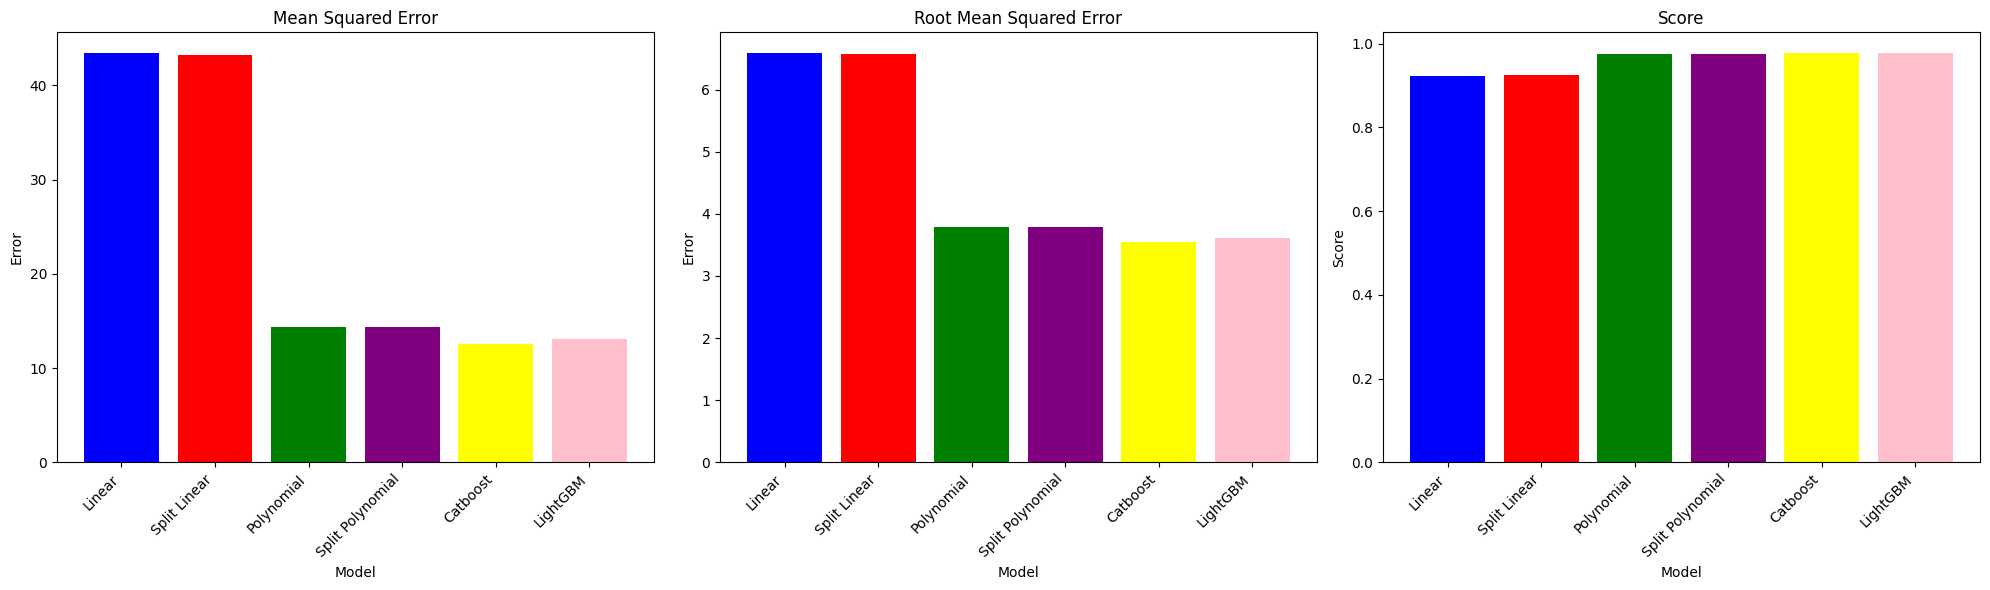

In [ ]:

# Hesaplanan hata değerlerini ve skorları bir liste haline getir
mse_values = [mse1, mse3, mse2, mse4,mse5,mselg]
rmse_values = [rmse1, rmse3, rmse2, rmse4,rmse5,rmselg]
score_values = [score1, score3, score2, score4,score5,scorelg]

# Modellerin isimlerini bir liste haline getir
labels = ['Linear','Split Linear', 'Polynomial', 'Split Polynomial','Catboost','LightGBM']

# MSE değerlerini görselleştir
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
plt.bar(labels, mse_values, color=['blue', 'red', 'green', 'purple','yellow','pink'])
plt.title('Mean Squared Error')
plt.xlabel('Model')
plt.ylabel('Error')
plt.xticks(rotation=45, ha='right')

# RMSE değerlerini görselleştir
plt.subplot(1, 3, 2)
plt.bar(labels, rmse_values, color=['blue', 'red', 'green', 'purple','yellow','pink'])
plt.title('Root Mean Squared Error')
plt.xlabel('Model')
plt.ylabel('Error')
plt.xticks(rotation=45, ha='right')

# Score değerlerini görselleştir
plt.subplot(1, 3, 3)
plt.bar(labels, score_values, color=['blue', 'red', 'green', 'purple','yellow','pink'])
plt.title('Score')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


**LightGBM büyük veri setlerinde daha hızlıdır ve daha az bellek kullanır.Bu sebeple daha büyük veri setlerinde LightGBM tercih edilir.**